In [4]:
import numpy as n
import pandas as p
import matplotlib.pyplot as mp 

In [5]:
a=p.read_csv('housing.csv')
a

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
# STEP 1

In [7]:
a1=a.copy()
a1.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
n.mean(a1.total_bedrooms),n.median(a1.total_bedrooms)

(np.float64(537.8705525375618), np.float64(nan))

In [9]:
a2=a1.fillna(n.mean(a1.total_bedrooms))

In [10]:
a2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# STEP 2

In [12]:
a2.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
# pip install skit-learn

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
o=OneHotEncoder()
categorical_encoding=o.fit_transform(a2[['ocean_proximity']])

In [16]:
o.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [17]:
categorical_encoding.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
o.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [19]:
# STEP 3

In [20]:
n=p.DataFrame(categorical_encoding.toarray(),columns=o.get_feature_names_out(),index=a2.index)

In [21]:
a3=p.concat([a2,n],axis=1)

In [22]:
a3.drop('ocean_proximity',axis=1,inplace=True)
a3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# STEP 4

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
a3_train,a3_test=train_test_split(a3,test_size=0.2,random_state=42)

In [26]:
a3_train.shape, a3_test.shape

((16512, 14), (4128, 14))

In [27]:
a3_train['ocean_proximity_INLAND'].value_counts()/a3_train.shape[0]

ocean_proximity_INLAND
0.0    0.680475
1.0    0.319525
Name: count, dtype: float64

In [28]:
a3_test['ocean_proximity_INLAND'].value_counts()/a3_test.shape[0]

ocean_proximity_INLAND
0.0    0.691134
1.0    0.308866
Name: count, dtype: float64

In [29]:
# STEP 5

In [30]:
a3_train_target=a3_train['median_house_value']
a3_train_set=a3_train.drop('median_house_value',axis=1)
a3_test_target=a3_test['median_house_value']
a3_test_set=a3_test.drop('median_house_value',axis=1)

In [31]:
a3_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [32]:
# STEP 6

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(a3_train_set,a3_train_target)

LinearRegression()

In [36]:
# STEP 7

In [37]:
p=lr.predict(a3_train_set)

In [38]:
# STEP 8

In [39]:
from sklearn.metrics import root_mean_squared_error

In [40]:
train_e=root_mean_squared_error(a3_train_target,lr.predict(a3_train_set))

In [41]:
train_e

68463.95973646686

In [42]:
# STEP 9

In [43]:
p_data=lr.predict(a3_test_set)

In [44]:
# STEP 10 

In [45]:
test_e=root_mean_squared_error(a3_test_target,lr.predict(a3_test_set))

In [46]:
test_e

69753.90442145203

In [47]:
from sklearn.metrics import mean_absolute_error
train=mean_absolute_error(a3_train_target,lr.predict(a3_train_set))
test=mean_absolute_error(a3_test_target,lr.predict(a3_test_set))
train,test

(49548.92464792169, 50723.925588428734)

In [48]:
# Attempt 1 for improvement
# Scaling all the features on scale of 0-1 using MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
MMS=MinMaxScaler()

In [51]:
MMS.fit(a3_train_set)

MinMaxScaler()

In [52]:
MMS.data_min_, MMS.data_max_

(array([-124.35  ,   32.54  ,    1.    ,    2.    ,    1.    ,    3.    ,
           1.    ,    0.4999,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ]),
 array([-1.14310e+02,  4.19500e+01,  5.20000e+01,  3.26270e+04,
         6.44500e+03,  3.56820e+04,  6.08200e+03,  1.50001e+01,
         1.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00,
         1.00000e+00]))

In [53]:
a3_train_sc=MMS.transform(a3_train_set)

In [54]:
type(a3_train_sc)

numpy.ndarray

In [55]:
a3_train_sc.shape

(16512, 13)

In [56]:
lr_MMS=LinearRegression()

In [57]:
lr_MMS.fit(a3_train_sc,a3_train_target)

LinearRegression()

In [58]:
train_e_MMS=root_mean_squared_error(a3_train_target,lr_MMS.predict(a3_train_sc))

In [59]:
train_e_MMS

68463.95973646686

In [60]:
# Attempt 2 using standard scaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
SS=StandardScaler()

In [63]:
a3_train_std_sc=SS.fit_transform(a3_train_set)

In [64]:
a3_train_std_sc[:5]

array([[ 1.17299302, -1.35041487,  0.42853749,  1.57055658,  1.37480982,
         1.0810111 ,  1.50750741,  0.37969797, -0.89161523, -0.68524603,
        -0.01740407, -0.3527218 ,  2.62615692],
       [ 1.26802809, -1.37853628, -1.47350948, -0.8094394 , -0.90337474,
        -0.64384214, -0.87870693,  0.42006824, -0.89161523, -0.68524603,
        -0.01740407, -0.3527218 ,  2.62615692],
       [-1.3529389 ,  0.98834939, -0.04697426,  1.9942892 ,  2.43940451,
         1.36319568,  2.5938282 , -0.09231969, -0.89161523, -0.68524603,
        -0.01740407,  2.83509556, -0.38078456],
       [-1.12785585,  0.75869118, -0.28473013,  0.64655814,  0.2285081 ,
         0.66126154,  0.39481962,  0.68299933,  1.12156003, -0.68524603,
        -0.01740407, -0.3527218 , -0.38078456],
       [ 1.79322185, -1.08326143, -1.63201339, -1.11790554, -1.18454309,
        -1.20380217, -1.25575517, -1.25556038, -0.89161523,  1.45932987,
        -0.01740407, -0.3527218 , -0.38078456]])

In [65]:
lr_SS = LinearRegression()

In [66]:
lr_SS.fit(a3_train_std_sc,a3_train_target)

LinearRegression()

In [67]:
train_error_std_sc=root_mean_squared_error(a3_train_target,lr_SS.predict(a3_train_std_sc))

In [68]:
train_error_std_sc

68463.95973646687

In [71]:
# Attempt 3 Using Feature Engineering

In [69]:
a3.corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [70]:
a3['rooms_per_household']=a3['total_rooms']/a3['households']
a3['bedrooms_per_room']=a3['total_bedrooms']/a3['total_rooms']
a3['population_per_household']=a3['population']/a3['households']

In [72]:
a3.corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.220049
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

In [73]:
a4_FE=a3.drop(['total_rooms','total_bedrooms','population'],axis=1)

In [74]:
a4_FE_train,a4_FE_test=train_test_split(a4_FE,test_size=0.2,random_state=42)

In [75]:
a4_FE_target=a4_FE_train['median_house_value']
a4_FE_train_set=a4_FE_train.drop(['median_house_value'],axis=1)

In [76]:
lr_FE=LinearRegression()

In [77]:
lr_FE.fit(a4_FE_train_set,a4_FE_target)

LinearRegression()

In [78]:
FE_train_error=root_mean_squared_error(a4_FE_target,lr_FE.predict(a4_FE_train_set))

In [79]:
FE_train_error

70691.03915618548

In [81]:
FE_mmscaler=MinMaxScaler()
a4_FE_train_sc=FE_mmscaler.fit_transform(a4_FE_train_set)

In [82]:
a4_FE_train_sc[:5]

array([[0.71015936, 0.02231668, 0.64705882, 0.17612235, 0.28192025,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.0333928 , 0.03858628, 0.0014352 ],
       [0.72908367, 0.01594049, 0.17647059, 0.02729814, 0.28723052,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.03195514, 0.03735798, 0.00280639],
       [0.20717131, 0.55260361, 0.52941176, 0.24387436, 0.21983145,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.02671086, 0.05015169, 0.0010556 ],
       [0.25199203, 0.50053135, 0.47058824, 0.10672587, 0.32181625,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.03756387, 0.03060332, 0.00213936],
       [0.83366534, 0.08289054, 0.1372549 , 0.00378227, 0.06681977,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.06460855, 0.04048463, 0.00155531]])

In [83]:
lr_FE_mmc=LinearRegression()

In [84]:
lr_FE_mmc.fit(a4_FE_train_sc,a4_FE_target)

LinearRegression()

In [85]:
FE_mmc_train_error=root_mean_squared_error(a4_FE_target,lr_FE_mmc.predict(a4_FE_train_sc))

In [87]:
FE_mmc_train_error

70691.03915618548

In [93]:
# set upper limit of total_room, total_bedrooms, population, households = mean + 3 * std_dev
a3_no_outlier=a3.copy()
#upper limet
upper_limit_bedrooms=a3['total_bedrooms'].mean()+1.5*a3['total_bedrooms'].std()
upper_limit_rooms=a3['total_rooms'].mean()+1.5* a3['total_rooms'].std()
upper_limit_population=a3['population'].mean()+1.5*a3['population'].std()
upper_limit_households=a3['households'].mean()+1.5*a3['households'].std()
#lower limit
lower_limit_bedrooms=a3['total_bedrooms'].mean()-3*a3['total_bedrooms'].std()
lower_limit_rooms=a3['total_rooms'].mean()-3*a3['total_rooms'].std()
lower_limit_population=a3['population'].mean()-3*a3['population'].std()
lower_limit_households=a3['households'].mean()-3*a3['households'].std()
# Apply both the limits
#upper
a3_no_outlier.loc [a3_no_outlier['total_bedrooms']>upper_limit_bedrooms]=upper_limit_bedrooms
a3_no_outlier.loc[a3_no_outlier['total_rooms']>upper_limit_rooms]=upper_limit_rooms
a3_no_outlier.loc[a3_no_outlier['population']>upper_limit_population]=upper_limit_population
a3_no_outlier.loc[a3_no_outlier['households']>upper_limit_households]=upper_limit_households
# lower
a3_no_outlier.loc[a3_no_outlier['total_bedrooms']<lower_limit_bedrooms]=lower_limit_bedrooms
a3_no_outlier.loc[a3_no_outlier['total_rooms']<lower_limit_rooms]=lower_limit_rooms
a3_no_outlier.loc[a3_no_outlier['population']<lower_limit_population]=lower_limit_population
a3_no_outlier.loc[a3_no_outlier['households']<lower_limit_households]=lower_limit_households

In [110]:
import seaborn as sb

<Axes: >

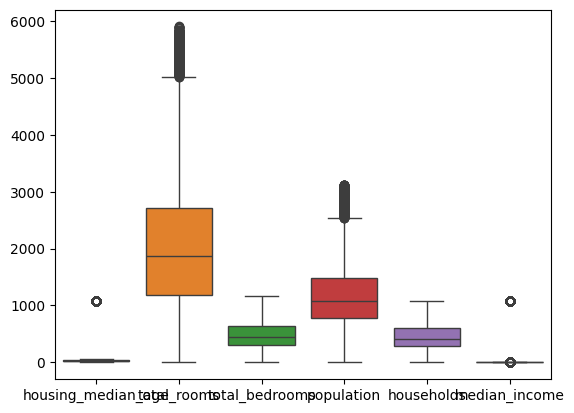

In [111]:
sb.boxplot(a3_no_outlier[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']])

In [112]:
a3_no_outlier_train,a3_no_outlier_test=train_test_split(a3_no_outlier,test_size=0.2,random_state=42)
a3_no_outlier_train_target=a3_no_outlier_train['median_house_value']
a3_no_outlier_train_set=a3_no_outlier_train.drop('median_house_value',axis=1)
a3_no_outlier_test_target=a3_no_outlier_test['median_house_value']
a3_no_outlier_test_set=a3_no_outlier_test.drop('median_house_value',axis=1)

In [113]:
lr_no_outlier=LinearRegression()
lr_no_outlier.fit(a3_no_outlier_train_set,a3_no_outlier_train_target)

LinearRegression()

In [114]:
error_no_outlier_train=root_mean_squared_error(a3_no_outlier_train_target,lr_no_outlier.predict(a3_no_outlier_train_set))

In [115]:
error_no_outlier_train # at upper limit mean + 2.0 std =>
# at upper limit mean + 1.5 std =>

63731.628532341376

In [116]:
error_no_outlier_test=root_mean_squared_error(a3_no_outlier_test_target,lr_no_outlier.predict(a3_no_outlier_test_set))

In [117]:
error_no_outlier_test # at upper limit mean + 2.0 std =>
# at upper limit mean + 1.5 std =>

65163.487395535376